# Libraries and versions

In [1]:
python_version = !python -V #version 3.7.9
import pandas as pd #version 1.2.3
import numpy as np #version 1.19.2
import seaborn as sns #version 0.11.0
import matplotlib as plt #version 3.3.3
from sklearn import __version__ as skl #0.24.1
from category_encoders import __version__ as ce_version #version 2.2.2

#for machine learning models
#pre processing
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

#model selection
from sklearn.model_selection import train_test_split

#model
from sklearn.tree import DecisionTreeClassifier

#validate model
from sklearn.metrics import accuracy_score

#Visualization
from sklearn.tree import plot_tree

In [2]:
print(f'Python version - {python_version[0][7:]}')
print(f'Pandas version - {pd.__version__}')
print(f'Numpy version - {np.__version__}')
print(f'Seaborn version - {sns.__version__}')
print(f'Matplotlib version - {plt.__version__}')
print(f'Category Encoders version - {ce_version}')
print(f'Sklearn version - {skl}')

Python version - 3.8.8
Pandas version - 1.2.4
Numpy version - 1.20.1
Seaborn version - 0.11.1
Matplotlib version - 3.3.4
Category Encoders version - 2.2.2
Sklearn version - 0.24.1


# Configurations

## Pandas

In [3]:
#apresentará 500 colunas e linhas
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## Seaborn

In [4]:
sns.set_palette('tab20b')
sns.set_style('darkgrid')

def configuration(graphic_object, title=None, xlabel=None, ylabel=None, colors=None):
    graphic_object.figure.set_size_inches(15,4)
    graphic_object.set_title(title, color=colors, fontsize=16)
    graphic_object.set_xlabel(xlabel, color=colors, fontsize=14)
    graphic_object.set_ylabel(ylabel, color=colors, fontsize=14)
    graphic_object = graphic_object

## Warnings

In [5]:
import warnings
warnings.filterwarnings("ignore")

## Dataset

In [6]:
gym = pd.read_csv('gym_model.csv')
gym.sample(10)

,number_people,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year,class_crowded_3
33406,1,4,0,0,56.00,0,0,7,3,2016,empty
26628,0,3,0,0,53.33,0,1,5,3,2016,empty
25655,18,3,0,0,59.54,0,1,5,8,2016,bellow_mean
57579,2,2,0,0,49.76,0,0,12,8,2016,empty
37927,27,0,0,0,63.95,0,0,8,15,2016,bellow_mean
14870,49,3,0,0,53.83,0,0,1,12,2016,above_mean
18588,0,6,1,0,48.50,0,1,2,5,2016,empty
13037,26,5,1,0,51.77,0,0,12,16,2015,bellow_mean
16904,18,3,0,0,49.80,0,1,2,6,2016,bellow_mean
21978,27,5,1,0,57.76,0,1,3,23,2016,bellow_mean


In [7]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59116 entries, 0 to 59115
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         59116 non-null  int64  
 1   day_of_week           59116 non-null  int64  
 2   is_weekend            59116 non-null  int64  
 3   is_holiday            59116 non-null  int64  
 4   temperature           59116 non-null  float64
 5   is_start_of_semester  59116 non-null  int64  
 6   is_during_semester    59116 non-null  int64  
 7   month                 59116 non-null  int64  
 8   hour                  59116 non-null  int64  
 9   year                  59116 non-null  int64  
 10  class_crowded_3       59116 non-null  object 
dtypes: float64(1), int64(9), object(1)
memory usage: 5.0+ MB


## Enconding columns year and class_crowded_3

In [8]:
map_encoders = [
    {'col':'year', 'mapping':{2015:1, 2016:2}},
    {'col':'class_crowded_3', 'mapping':{'empty':0, 'bellow_mean':1, 'above_mean':3, 'crowded':4}}
]

encoder = OrdinalEncoder(
    cols=['year', 'class_crowded_3'],
    mapping=map_encoders
)

gym_encoded = encoder.fit_transform(gym)
gym_encoded

,number_people,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year,class_crowded_3
0,37,4,0,0,71.76,0,0,8,17,1,3
1,45,4,0,0,71.76,0,0,8,17,1,3
2,40,4,0,0,71.76,0,0,8,17,1,3
3,44,4,0,0,71.76,0,0,8,17,1,3
4,45,4,0,0,71.76,0,0,8,17,1,3
...,...,...,...,...,...,...,...,...,...,...,...
59111,0,5,1,0,48.97,0,0,12,23,2,0
59112,0,5,1,0,48.97,0,0,12,23,2,0
59113,0,5,1,0,48.97,0,0,12,23,2,0
59114,0,5,1,0,48.97,0,0,12,23,2,0


## Split dataset in X and Y

In [9]:
X_original = gym_encoded.drop(columns=['class_crowded_3'])
y_original = gym_encoded['class_crowded_3']

## Scaler independent variables

In [10]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X_original)
X_scaler = pd.DataFrame(X_scaler, columns=X_original.columns)
X_scaler.head()

,number_people,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,year
0,0.326489,0.49718,-0.635411,0.0,2.091725,-0.288008,-1.373251,0.085771,0.703524,-1.832129
1,0.675128,0.49718,-0.635411,0.0,2.091725,-0.288008,-1.373251,0.085771,0.703524,-1.832129
2,0.457229,0.49718,-0.635411,0.0,2.091725,-0.288008,-1.373251,0.085771,0.703524,-1.832129
3,0.631548,0.49718,-0.635411,0.0,2.091725,-0.288008,-1.373251,0.085771,0.703524,-1.832129
4,0.675128,0.49718,-0.635411,0.0,2.091725,-0.288008,-1.373251,0.085771,0.703524,-1.832129


## Split in train and test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler,
                                                    y_original,
                                                    train_size=0.8,
                                                    stratify=y_original,
                                                    random_state=666)

print(f'X_train = {X_train.shape[0]} samples / X_test = {X_test.shape[0]}')
print(f'X_train = {y_train.shape[0]} samples / X_test = {y_test.shape[0]}')

X_train = 47292 samples / X_test = 11824
X_train = 47292 samples / X_test = 11824


## Decision Tree Classifier

----------------------------------------
Accuracy for model_dtc = 100.00%
----------------------------------------


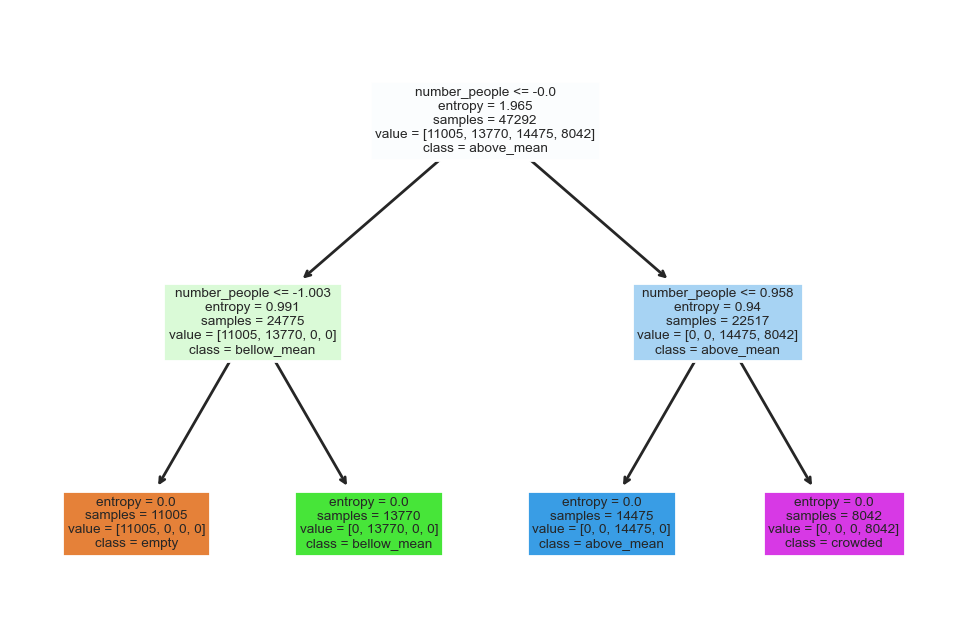

In [12]:
model_dtc = DecisionTreeClassifier(criterion='entropy',
                                   max_depth=3,
                                   random_state=666,
                                   min_samples_split=30)

model_dtc.fit(X_train, y_train)
y_predict = model_dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_predict) * 100

print('-' * 40)
print(f'Accuracy for model_dtc = {accuracy:.2f}%')
print('-' * 40)

#Graphic
fig, axes = plt.pyplot.subplots(nrows = 1,ncols = 1, dpi=200)
plot_tree(model_dtc, 
          feature_names=X_train.columns,
          filled=True,
          class_names=['empty', 'bellow_mean', 'above_mean', 'crowded']);

=======================================================
- I did a mistake here, when I did not drop feature number_people the model used this value to classify target 

- that feature must be droped

=======================================================

## Decision Tree Classifier 2

In [13]:
#Drop feature number_people
X_train_2 = X_train.drop(columns=['number_people'])
X_test_2 = X_test.drop(columns=['number_people'])

----------------------------------------
Accuracy for model_dtc_2 = 61.91%
----------------------------------------


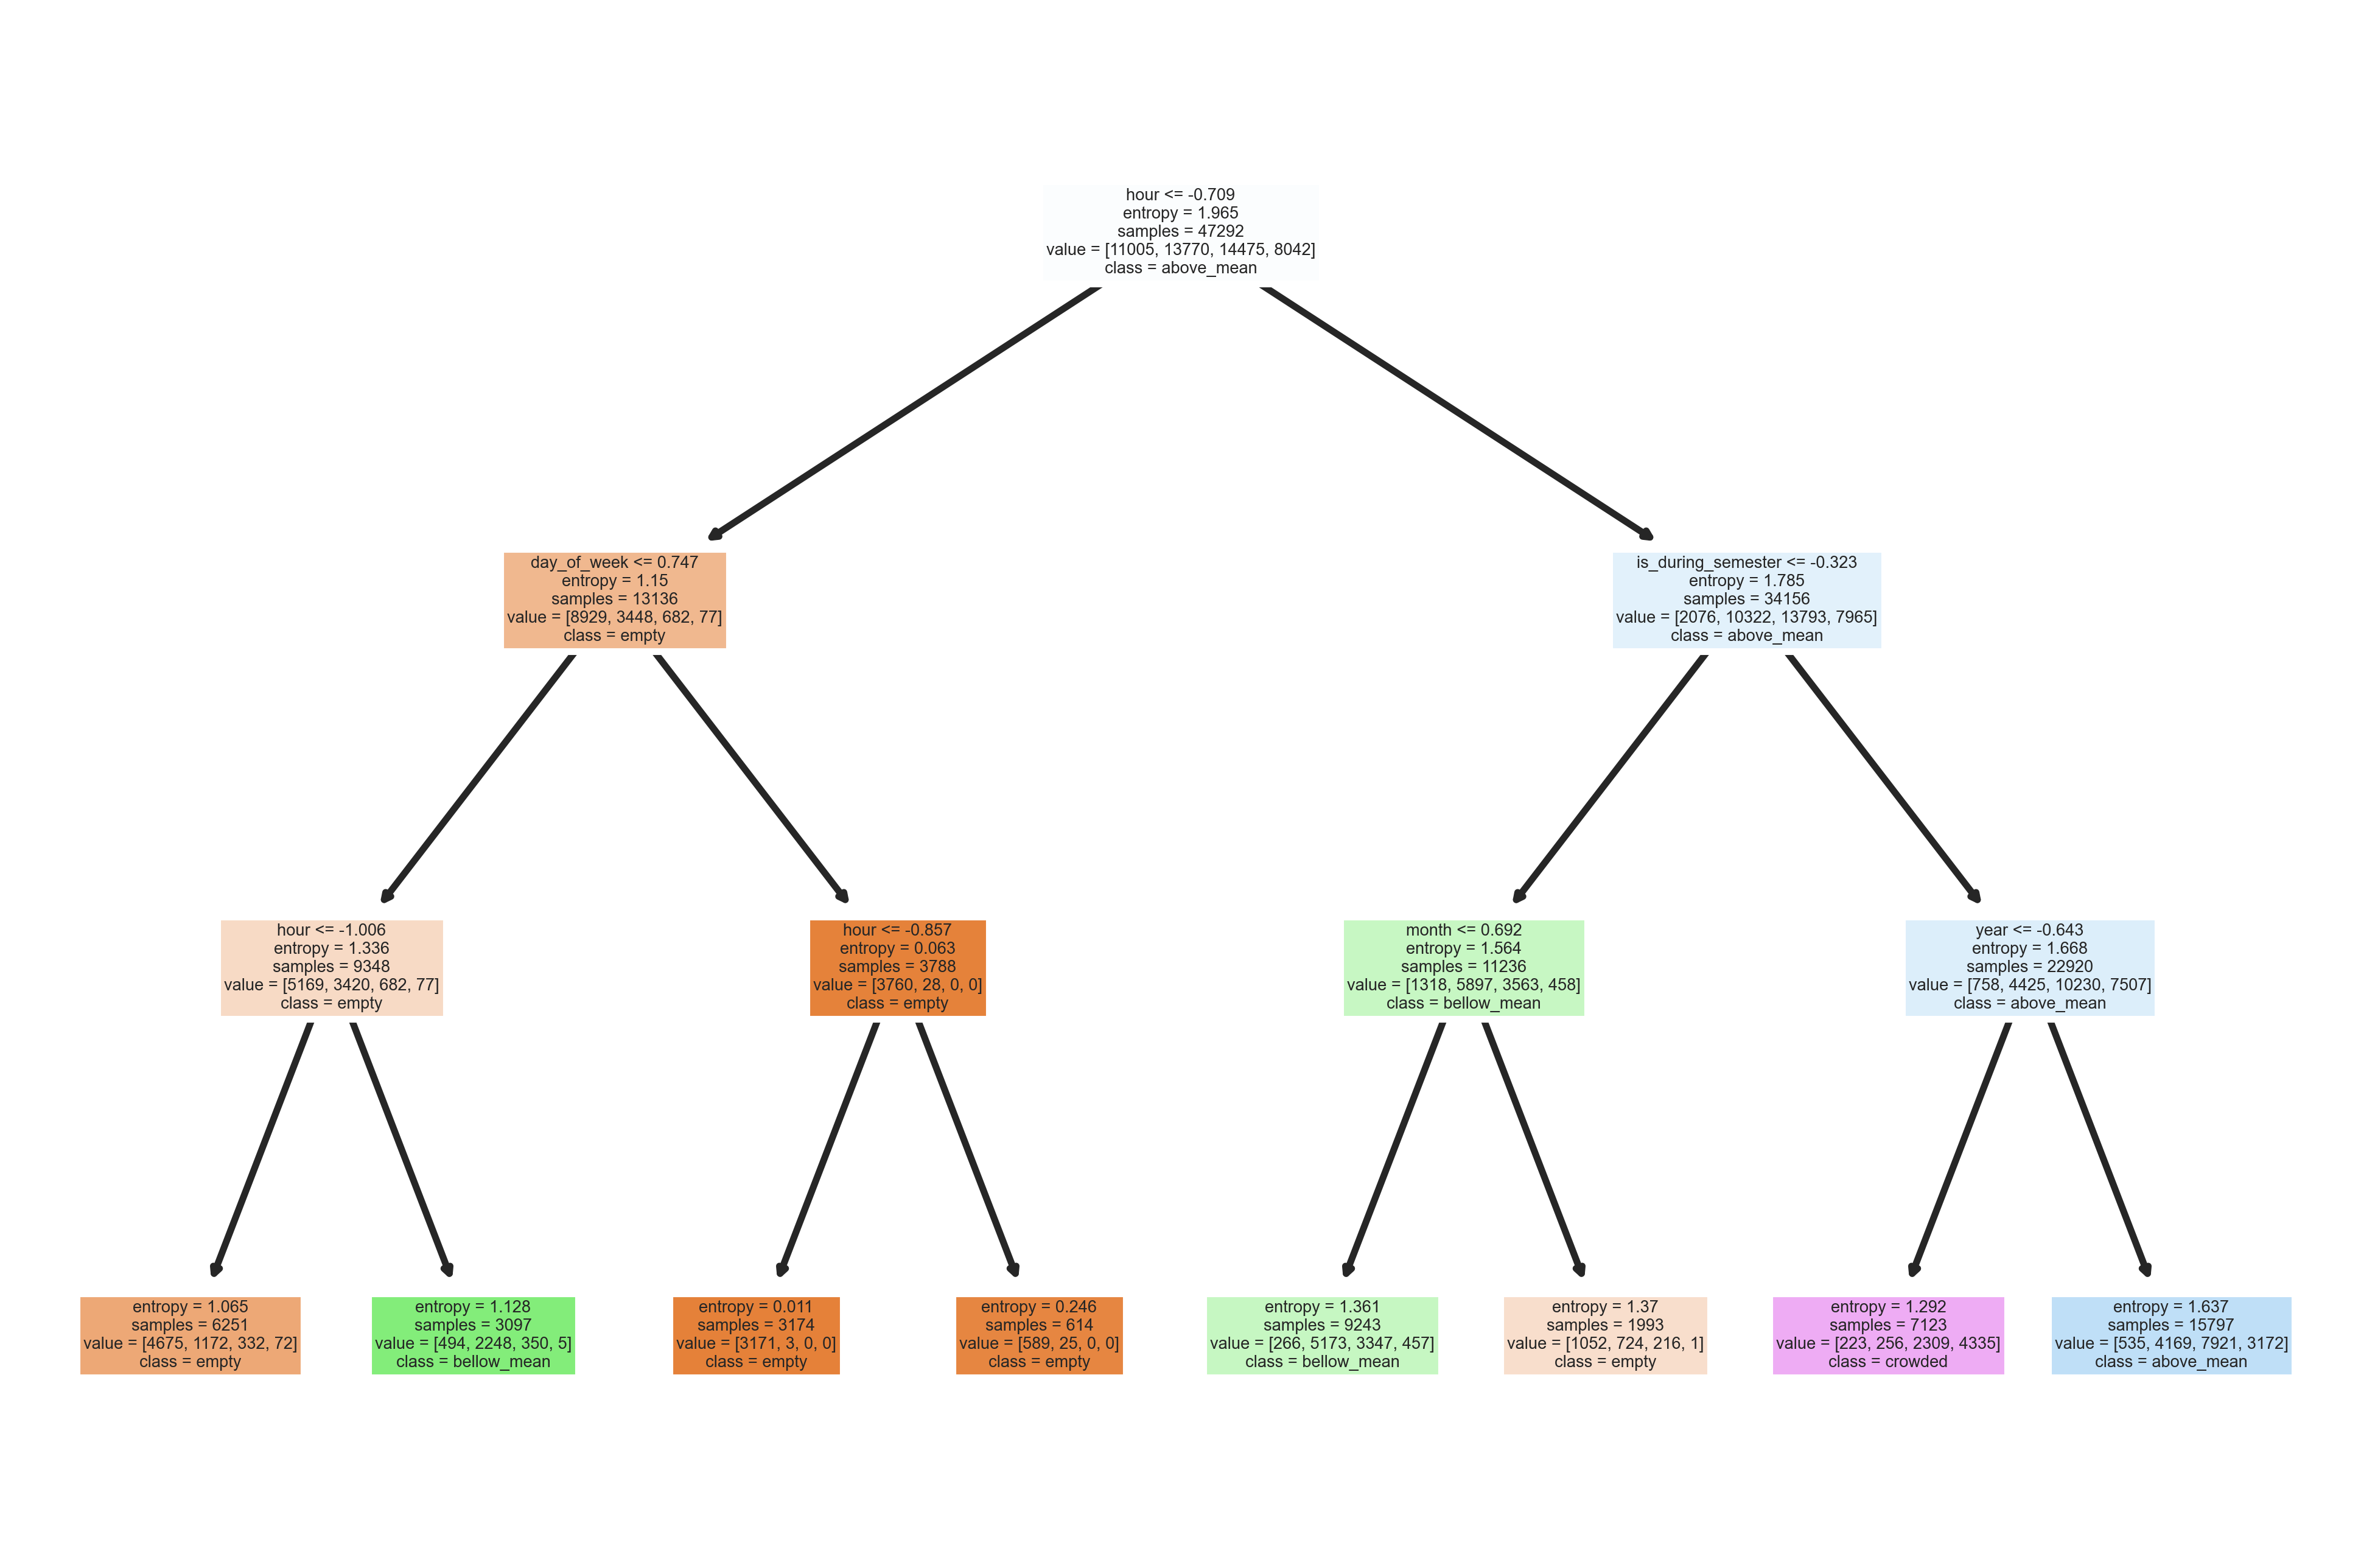

In [23]:
model_dtc_2 = DecisionTreeClassifier(criterion='entropy',
                                   max_depth=3,
                                   random_state=666,
                                   min_samples_split=30)

model_dtc_2.fit(X_train_2, y_train)
y_predict_2 = model_dtc_2.predict(X_test_2)
accuracy_2 = accuracy_score(y_test, y_predict_2) * 100

print('-' * 40)
print(f'Accuracy for model_dtc_2 = {accuracy_2:.2f}%')
print('-' * 40)

#Graphic
fig, axes = plt.pyplot.subplots(nrows = 1,ncols = 1,dpi=800)
plot_tree(model_dtc_2, 
          feature_names=X_train_2.columns,
          filled=True,
          class_names=['empty', 'bellow_mean', 'above_mean', 'crowded']);

## Decision Tree Classifier 3 (without Scaler)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_original,      #using original data for X
                                                    y_original,
                                                    train_size=0.8,
                                                    stratify=y_original,
                                                    random_state=666)

print(f'X_train = {X_train.shape[0]} samples / X_test = {X_test.shape[0]}')
print(f'X_train = {y_train.shape[0]} samples / X_test = {y_test.shape[0]}')

#drop feature number_people
X_train_3 = X_train.drop(columns=['number_people'])
X_test_3 = X_test.drop(columns=['number_people'])

X_train = 47292 samples / X_test = 11824
X_train = 47292 samples / X_test = 11824


----------------------------------------
Accuracy for model_dtc_2 = 61.91%
----------------------------------------


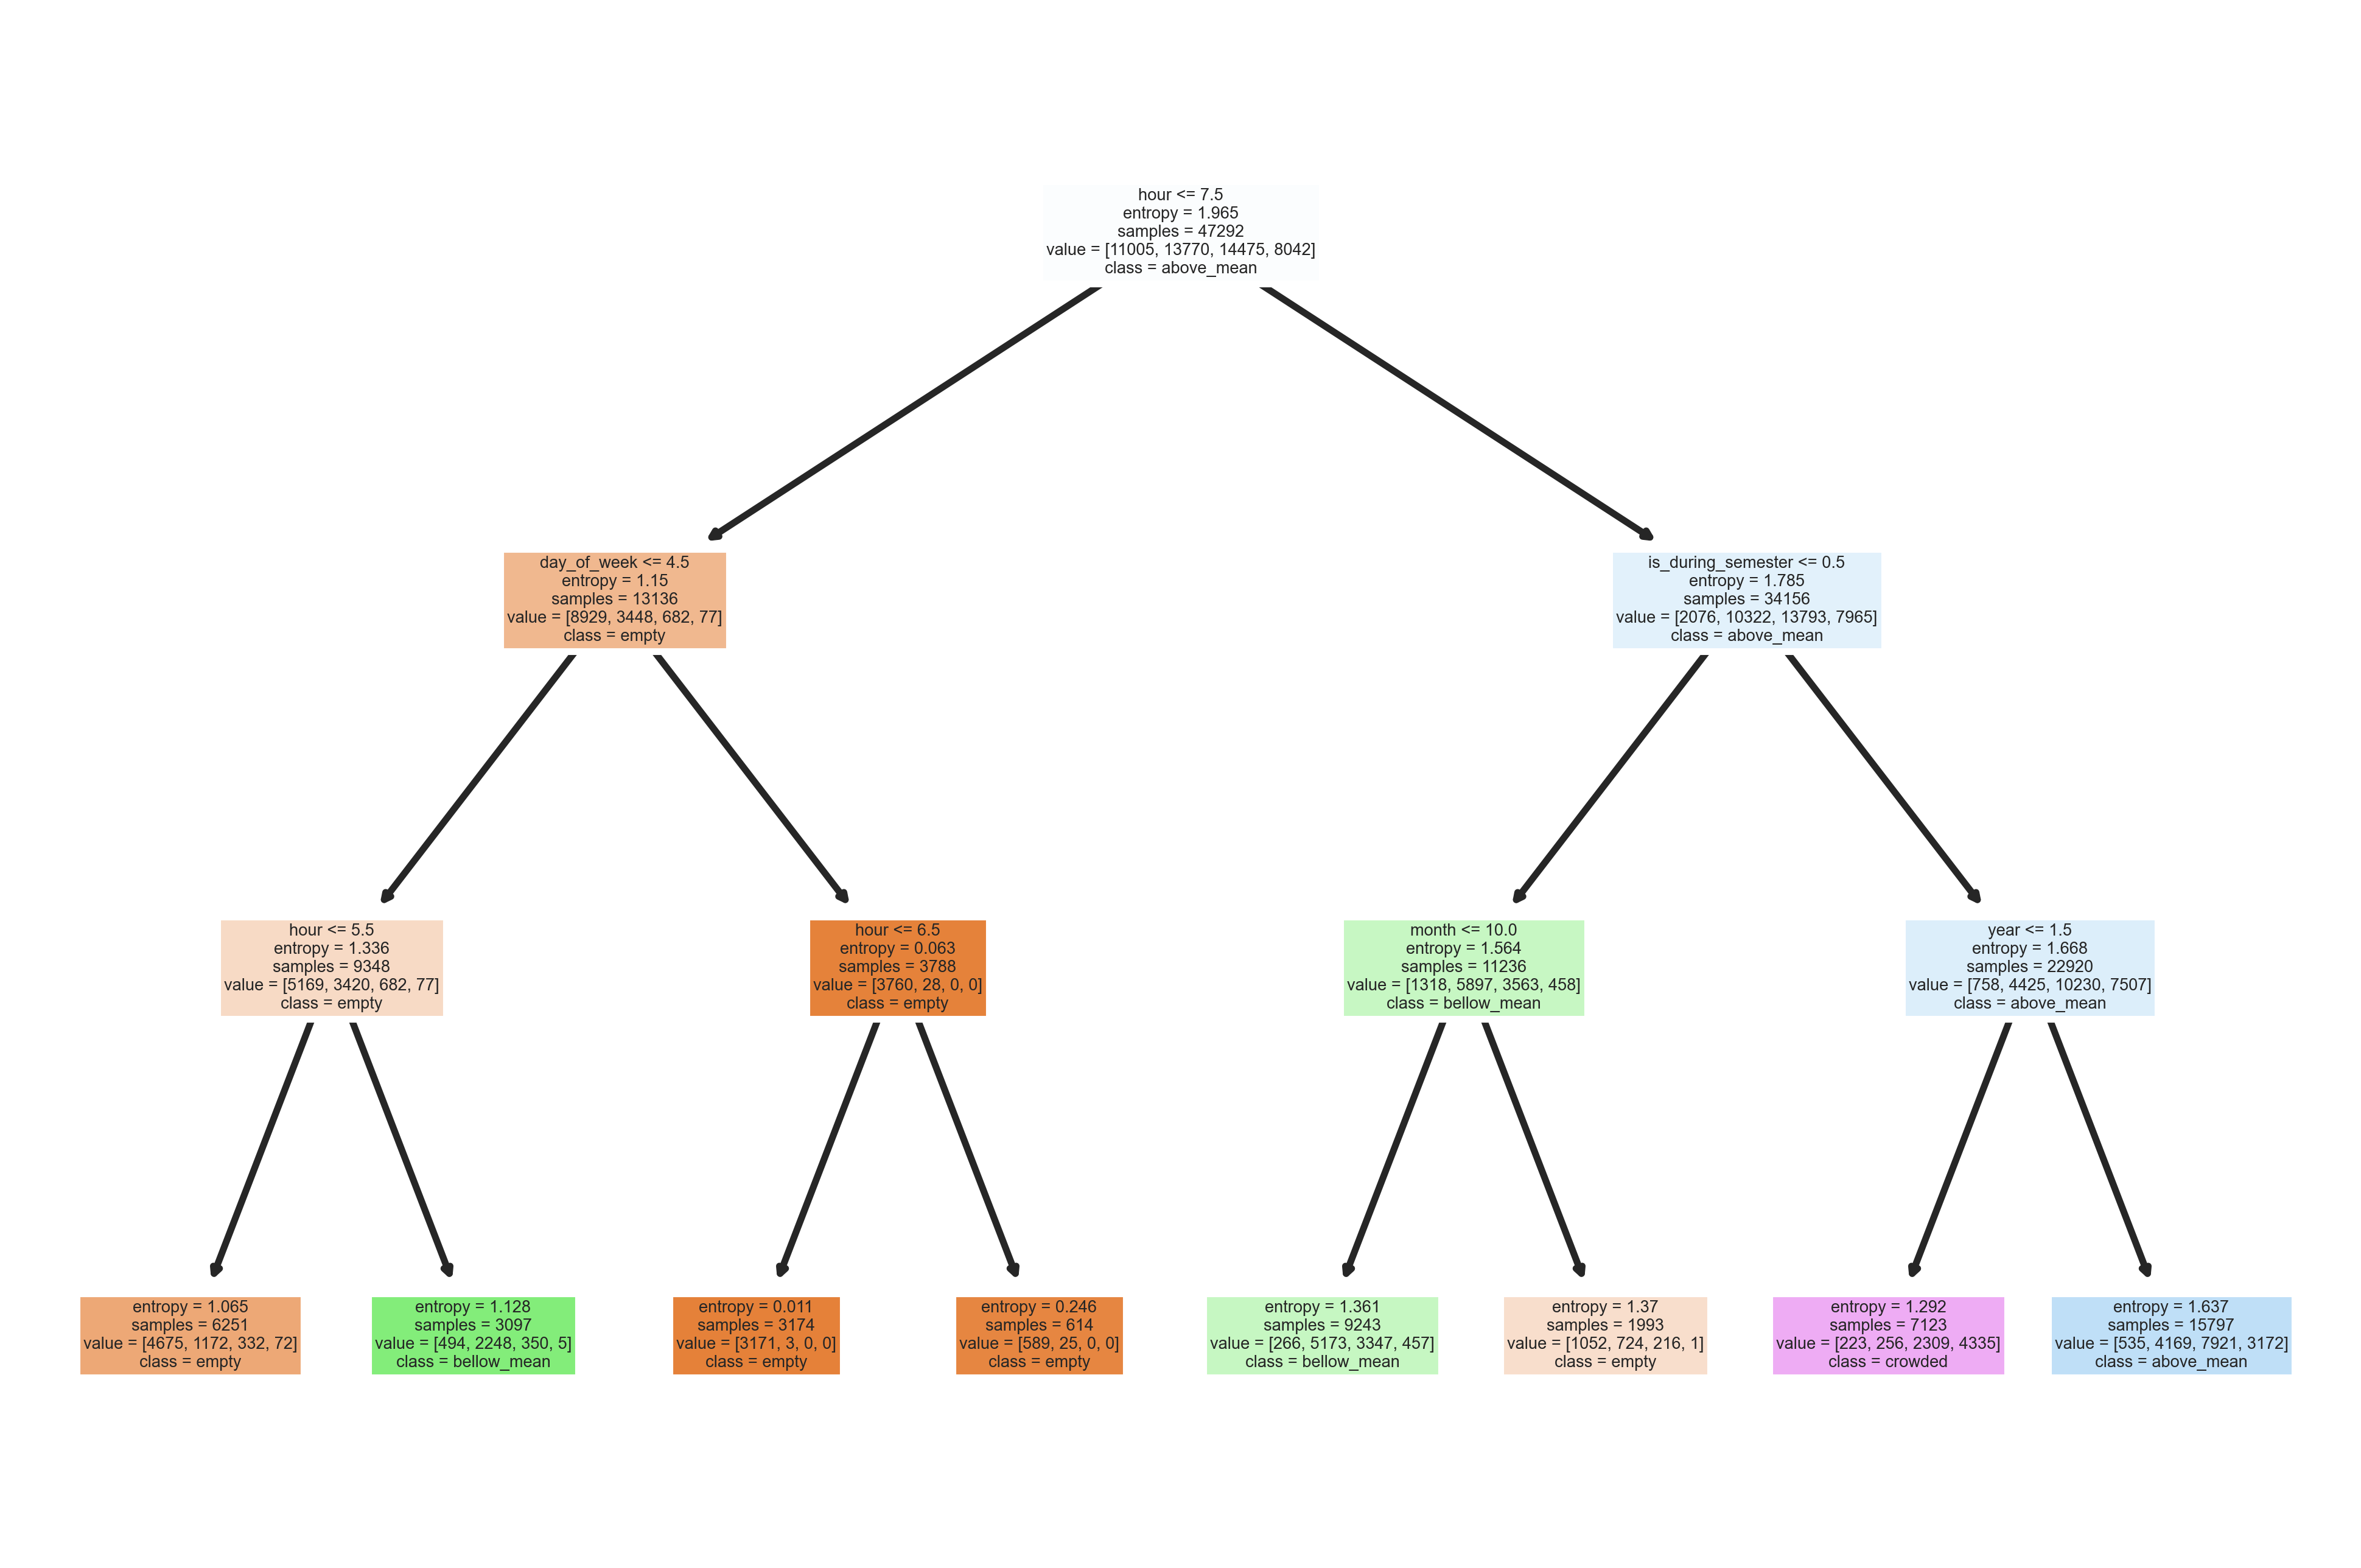

In [21]:
model_dtc_3 = DecisionTreeClassifier(criterion='entropy',
                                   max_depth=3,
                                   random_state=666,
                                   min_samples_split=30)

model_dtc_3.fit(X_train_3, y_train)
y_predict_3 = model_dtc_3.predict(X_test_3)
accuracy_3 = accuracy_score(y_test, y_predict_3) * 100

print('-' * 40)
print(f'Accuracy for model_dtc_2 = {accuracy_3:.2f}%')
print('-' * 40)

#Graphic
fig, axes = plt.pyplot.subplots(nrows = 1,ncols = 1,dpi=800)
plot_tree(model_dtc_3, 
          feature_names=X_train_3.columns,
          filled=True,
          class_names=['empty', 'bellow_mean', 'above_mean', 'crowded']);

In [18]:
result = {
    'validation':y_test,
    'predict':y_predict_3
}

df_result = pd.DataFrame(result)
df_result['check'] = df_result['validation'] == df_result['predict']
df_result.groupby('validation')['check'].value_counts(normalize=True)

validation  check
0           True     0.871730
            False    0.128270
1           True     0.550392
            False    0.449608
3           True     0.540757
            False    0.459243
4           True     0.531841
            False    0.468159
Name: check, dtype: float64